17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 500)
Test data shape: (25000, 500)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 254ms/step - accuracy: 0.5627 - loss: 0.6724 - val_accuracy: 0.5344 - val_loss: 0.8155
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 99s 253ms/step - accuracy: 0.6518 - loss: 0.6255 - val_accuracy: 0.6603 - val_loss: 0.6087
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 260ms/step - accuracy: 0.7740 - loss: 0.4695 - val_accuracy: 0.5799 - val_loss: 0.6580
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 255ms/step - accuracy: 0.6808 - loss: 0.5959 - val_accuracy: 0.6398 - val_loss: 0.6276
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 263ms/step - accuracy: 0.7335 - loss: 0.5289 - val_accuracy: 0.6830 - val_loss: 0.6111
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6828 - loss: 0.6156
Test Accuracy: 68.30%
Test Loss: 0.6111


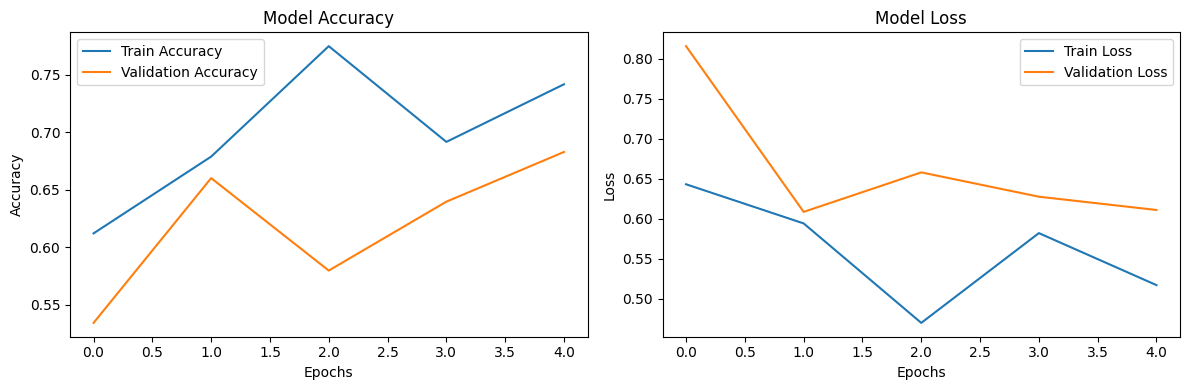

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Sentiment: Negative


In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

# Load the IMDB dataset from Keras
from tensorflow.keras.datasets import imdb

# Set the number of words to consider for the dataset
num_words = 10000  # Limit the dataset to the top 10,000 words

# Load the IMDB dataset and keep only the most frequent 'num_words' words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to make them all the same length
max_len = 500  # We'll set the maximum length of each review to 500 words
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Build the RNN model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_len),
    SimpleRNN(128, activation='tanh'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification (positive or negative)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Visualize the training process (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predicting sentiment for a new review
new_review = "The movie was absolutely amazing, I loved every part of it!"

# Preprocess the review: Tokenize and pad it
word_index = imdb.get_word_index()
new_review_tokens = [word_index.get(word, 0) for word in new_review.lower().split()]
new_review_padded = pad_sequences([new_review_tokens], maxlen=max_len)

# Predict sentiment (0: Negative, 1: Positive)
prediction = model.predict(new_review_padded)
print(f"Sentiment: {'Positive' if prediction >= 0.5 else 'Negative'}")
